importing libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as datas
from sklearn import tree
from sklearn.model_selection import train_test_split

Loading the iris Dataset from sklearn

In [3]:
data = datas.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

***Checking the type of iris***

In [4]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


**finding the target**

In [5]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Target names**

In [6]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


**feature names**

In [7]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Giving names to columns**

In [9]:
df.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Checking if there is any missing values or not**

In [10]:
df.isnull().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0


**separating the traing and testing datas**

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)

***dsiplaying the details of training and testing dataset***

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**Creating the object of decision tree**

In [13]:
dt = tree.DecisionTreeClassifier(max_depth=4, criterion="entropy")

**Traing the model**

In [14]:
model = dt.fit(x_train, y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Making Prediction**

In [15]:
prediction = model.predict(x_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Measuring the accuracy**

In [16]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, prediction)
print(round(acc*100,2), "%")

100.0 %


**Visualizing the tree**

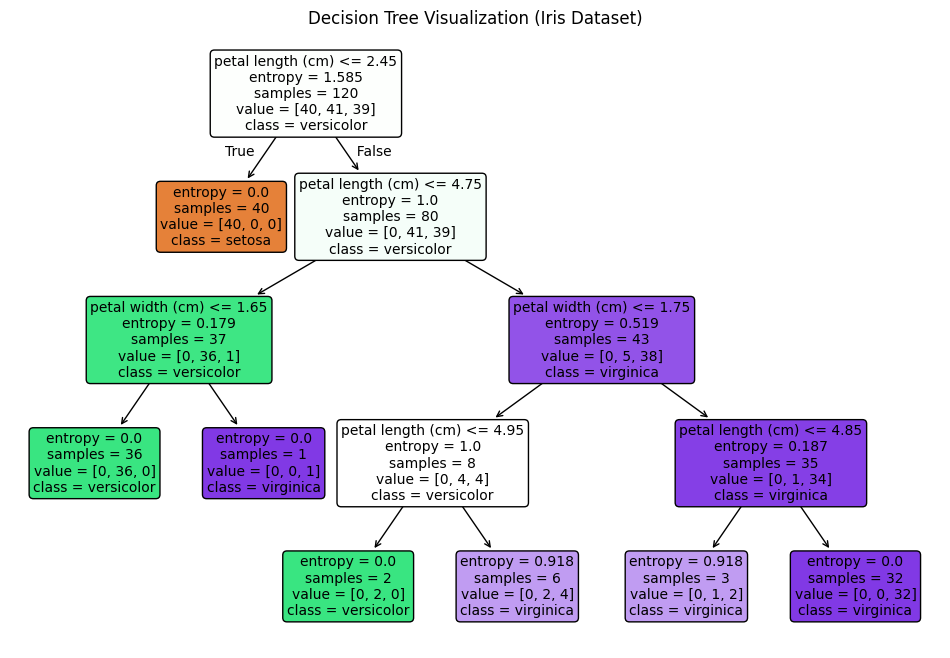

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(
    model,
    feature_names=data.feature_names,       # Column names for X
    class_names=data.target_names,          # Target labels (species names)
    filled=True,                            # Fill colors to represent classes
    rounded=True,                           # Rounded boxes for better visuals
    fontsize=10                             # Font size
)

# Set title
plt.title("Decision Tree Visualization (Iris Dataset)")

# Show the plot
plt.show()


**Another method to visualize**

In [18]:

import graphviz
#Export the tree to DOT format
dot_data = tree.export_graphviz(
    model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a Graphviz Source object
graph = graphviz.Source(dot_data)

# Display the tree (works in Jupyter, VS Code, etc.)
graph.render("iris_tree", format="png", cleanup=False)  # Save as PNG
graph.view()  # Open the image in default viewer

'iris_tree.pdf'